<a href="https://colab.research.google.com/github/sanhiitaa/100-days-of-deep-learning/blob/main/transfer_learning_feature_extraction_w_o_data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing the kaggle API
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
# downloading the dataset
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:07<00:00, 192MB/s]
100% 1.06G/1.06G [00:08<00:00, 141MB/s]


In [3]:
# unzipping the folder
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
# importing the important libraries
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten
from keras.applications.vgg16 import VGG16

In [5]:
# extracting the convolution layers from the VGG16  model
conv_base=VGG16(weights='imagenet', # as trained on imagenet dataset
                include_top=False, # only includes the conv_base
                input_shape=(150,150,3))

58889256/58889256 [==============================] - 0s 0us/step


In [6]:
# conv_base summary
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [7]:
# creating a sequential model with pre-trained CNN layers and defining FC layers
model=Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 16812353 (64.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
conv_base.trainable=False # freezing the parameters of the convolution layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 2097665 (8.00 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [10]:
# generators
train_ds= keras.utils.image_dataset_from_directory(directory='/content/train',
                                                   labels='inferred',
                                                   label_mode='int',
                                                   batch_size=32,
                                                   image_size=(150,150))

validation_ds= keras.utils.image_dataset_from_directory(directory='/content/test',
                                                        labels='inferred',
                                                        label_mode='int',
                                                        batch_size=32,
                                                        image_size=(150,150))

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [11]:
# normalizing
def process(image, label):
  image= tf.cast(image/255., tf.float32)
  return image, label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [12]:
# compiling the model
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [13]:
# fitting the model
history= model.fit(train_ds,
                   epochs=10,
                   validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 79s 109ms/step - loss: 0.3267 - accuracy: 0.8646 - val_loss: 0.2334 - val_accuracy: 0.8996
Epoch 2/10
625/625 [==============================] - 61s 96ms/step - loss: 0.2162 - accuracy: 0.9080 - val_loss: 0.2079 - val_accuracy: 0.9108
Epoch 3/10
625/625 [==============================] - 68s 109ms/step - loss: 0.1788 - accuracy: 0.9265 - val_loss: 0.2002 - val_accuracy: 0.9172
Epoch 4/10
625/625 [==============================] - 60s 96ms/step - loss: 0.1545 - accuracy: 0.9374 - val_loss: 0.2123 - val_accuracy: 0.9160
Epoch 5/10
625/625 [==============================] - 60s 95ms/step - loss: 0.1307 - accuracy: 0.9480 - val_loss: 0.2791 - val_accuracy: 0.9028
Epoch 6/10
625/625 [==============================] - 58s 92ms/step - loss: 0.1077 - accuracy: 0.9575 - val_loss: 0.2432 - val_accuracy: 0.9092
Epoch 7/10
625/625 [==============================] - 59s 94ms/step - loss: 0.0873 - accuracy: 0.9665 - val_loss: 0.3113 - val_accurac

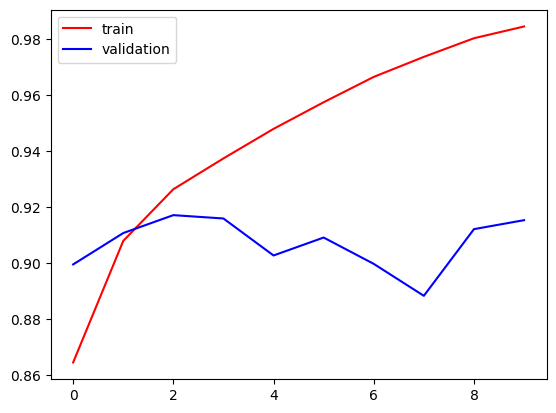

In [14]:
# plotting graphs
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train-accuracy')
plt.plot(history.history['val_accuracy'], color='blue', label='validation-accuracy')
plt.legend()
plt.show()

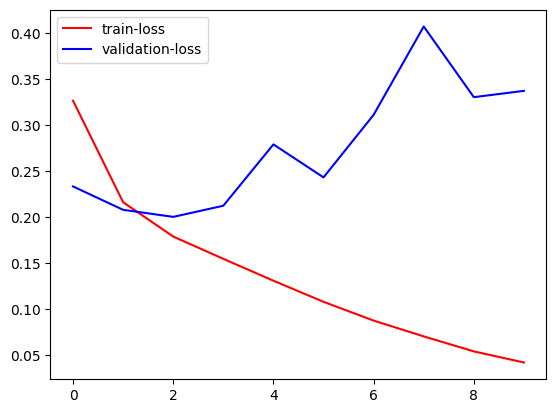

In [15]:
plt.plot(history.history['loss'], color='red', label='train-loss')
plt.plot(history.history['val_loss'], color='blue', label='validation-loss')
plt.legend()
plt.show()